# Analysis on Hotel Dataset

## Loading Cleaned Data

In [ ]:
dat <- read.csv("Data/df.csv",header=TRUE)
star.dat <- dat[,c(2,11:dim(dat)[2])]

## Manipulating Cleaned Data For the Analysis

In [20]:
freq <- function(argument1){
ind <- argument1
total.star1 <-length(which(star.dat$stars_x == 1))
total.star2 <-length(which(star.dat$stars_x == 2))
total.star3 <-length(which(star.dat$stars_x == 3))
total.star4 <-length(which(star.dat$stars_x == 4))
total.star5 <-length(which(star.dat$stars_x == 5))
total.v <- c(total.star1,total.star2,total.star3,total.star4,total.star5)

freq.dat <- cbind(star.dat$stars_x,star.dat[,ind])
star1 <-length(which(freq.dat[,1] == 1 & freq.dat[,2] >= 1))
star2 <-length(which(freq.dat[,1] == 2 & freq.dat[,2] >= 1))
star3 <-length(which(freq.dat[,1] == 3 & freq.dat[,2] >= 1))
star4 <-length(which(freq.dat[,1] == 4 & freq.dat[,2] >= 1))
star5 <-length(which(freq.dat[,1] == 5 & freq.dat[,2] >= 1))
v <- c(star1, star2, star3, star4, star5)

freq <- v/total.v
freq
}

freq.mat <- matrix(rep(NA,5),nrow=5)
for (i in 1:dim(star.dat)[2]-1){
  freq.vec <- freq(colnames(star.dat)[i+1])
  freq.mat <- cbind(freq.mat,freq.vec)
}
star.level <- levels(as.factor(star.dat$stars_x))
freq.data <- freq.mat[,-(1:2)]
colnames(freq.data) <- colnames(star.dat)[2:dim(star.dat)[2]]
freq.data <- as.data.frame(cbind(star.level,freq.data))

wordembedding.dat <- star.dat
for (i in 1:dim(star.dat)[2]-1){
  wordembedding.dat[which(star.dat[,i+1] >=1),i+1]=1
}
stars <- star.dat[,1]
wordembedding.dat <- cbind(stars,wordembedding.dat[,-1])
wordembedding.dat$stars <- as.factor(wordembedding.dat$stars)

In [21]:
head(freq.data)

,star.level,stayed,twice,short,period,time,first,liked,second,made,...,shirt,eating,lighting,police,homewood,roof,convention,governor,underground,americinn
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,0.271739130434783,0.0434782608695652,0.0253623188405797,0.0181159420289855,0.260869565217391,0.202898550724638,0,0.0942028985507246,0.0905797101449275,...,0.0072463768115942,0.0108695652173913,0.0072463768115942,0.0289855072463768,0.0036231884057971,0.0326086956521739,0.0072463768115942,0.0181159420289855,0,0.0072463768115942
2,2,0.253424657534247,0.0410958904109589,0.0273972602739726,0.00684931506849315,0.294520547945205,0.184931506849315,0.0136986301369863,0.089041095890411,0.089041095890411,...,0,0.00684931506849315,0,0.00684931506849315,0.0136986301369863,0.0205479452054795,0.0136986301369863,0.0273972602739726,0,0.0205479452054795
3,3,0.203125,0.015625,0.0833333333333333,0.0104166666666667,0.239583333333333,0.119791666666667,0.0416666666666667,0.03125,0.119791666666667,...,0,0.0104166666666667,0.00520833333333333,0,0.00520833333333333,0.0104166666666667,0,0.0104166666666667,0.00520833333333333,0
4,4,0.256038647342995,0.0120772946859903,0.0458937198067633,0.00241545893719807,0.210144927536232,0.0748792270531401,0.0531400966183575,0.0410628019323672,0.0628019323671498,...,0,0.0072463768115942,0.00966183574879227,0,0.00966183574879227,0.00241545893719807,0.0072463768115942,0.0338164251207729,0.0193236714975845,0.00483091787439614
5,5,0.281746031746032,0.0198412698412698,0.0357142857142857,0.00595238095238095,0.198412698412698,0.0992063492063492,0.0277777777777778,0.0396825396825397,0.119047619047619,...,0.00198412698412698,0.00793650793650794,0.0119047619047619,0,0.00992063492063492,0.00396825396825397,0.00992063492063492,0.0654761904761905,0.00396825396825397,0.0119047619047619


In [22]:
head(wordembedding.dat)

,stars,stayed,twice,short,period,time,first,liked,second,made,...,shirt,eating,lighting,police,homewood,roof,convention,governor,underground,americinn
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dim(wordembedding.dat)

[1] 1532 1396

In [24]:
head(star.dat)

,stars_x,stayed,twice,short,period,time,first,liked,second,made,...,shirt,eating,lighting,police,homewood,roof,convention,governor,underground,americinn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,2,1,1,1,7,2,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1,1,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dim(star.dat)

[1] 1532 1396

First, we loaded and sorted words based on how they are frquently used. For this procedure, we selected out the words more used than 3rd quantile.

In [2]:
words <- apply(star.dat[,2:dim(star.dat)[2]],2,sum)
sort(words[words>summary(words)[5]], decreasing= TRUE)

room         hotel          stay          nice     breakfast 
         2549          2068           975           860           769 
        staff         clean         great         place           one 
          733           721           716           659           622 
          bed         night         would       madison          good 
          608           600           596           552           550 
          get          like          desk          free        stayed 
          546           524           513           509           477 
         time          area         front      location          also 
          471           450           447           442           422 
     friendly        really             u          pool         didnt 
          410           407           399           392           375 
      service          back           day       parking          well 
          369           350           324           323           317 
  comfortable           bar          even         could           lot 
          313           310           301           299           293 
     bathroom         floor            go          dont    restaurant 
          283           275           274           264           264 
          got           two            im        shower          work 
          262           245           243           238           236 
        water          need       staying         lobby        people 
          234           234           232           227           226 
        thing        little         first       morning         check 
          226           225           224           224           222 
          hot          star           inn          make         price 
          219           217           216           214           207 
        next.         super          much         right        around 
          206           203           201           201           201 
   experience       helpful    definitely          food         small 
          199           195           194           194           193 
   everything         never          went           new          told 
          193           191           190           188           186 
         door        coffee       shuttle          hour            X2 
          186           185           184           183           183 
       pretty         guest           use          best        better 
          180           174           173           172           172 
          big          said          many          made           ive 
          171           170           165           164           164 
     business      downtown           way        enough            tv 
          161           159           156           156           155 
         year         every           say         suite         sleep 
          155           155           154           153           153 
        close        minute       manager         going          come 
          153           152           152           150           150 
        drink       overall          look           bit         wasnt 
          149           148           147           144           143 
    recommend        street        always          find          sure 
          142           142           141           141           140 
          old       weekend          away          feel            X3 
          140           138           138           138           136 
        issue          ever         quiet          came         large 
          135           135           135           135           134 
          see        though          take          know        called 
          133           131           130           130           130 
         view       checked        booked          give         still 
          130           130           129           129           128 
          kid          easy      

We built up a function to draw barplots of frequency of some choosed words

In [3]:
word.frequency <- function(argument1){
ind <- argument1
total.star1 <-length(which(star.dat$stars_x == 1))
total.star2 <-length(which(star.dat$stars_x == 2))
total.star3 <-length(which(star.dat$stars_x == 3))
total.star4 <-length(which(star.dat$stars_x == 4))
total.star5 <-length(which(star.dat$stars_x == 5))
total.v <- c(total.star1,total.star2,total.star3,total.star4,total.star5)

freq.dat <- cbind(star.dat$stars_x,star.dat[,ind])
star1 <-length(which(freq.dat[,1] == 1 & freq.dat[,2] >= 1))
star2 <-length(which(freq.dat[,1] == 2 & freq.dat[,2] >= 1))
star3 <-length(which(freq.dat[,1] == 3 & freq.dat[,2] >= 1))
star4 <-length(which(freq.dat[,1] == 4 & freq.dat[,2] >= 1))
star5 <-length(which(freq.dat[,1] == 5 & freq.dat[,2] >= 1))
v <- c(star1, star2, star3, star4, star5)

Frequency <- v/total.v

barplot(Frequency, xlab = "Rates", ylab = "Word Frequency", main=ind)
}

## Word Frequency Checking

Among the sorted words above, we are going to select out some words and break them in to 5 different parts, which are adjective words, the words associated with service, the words associated with facility, the words associated with location and the words associated with atmosphere of the hotel.

### Checking Whether the Analysis Works properly by some adjective words

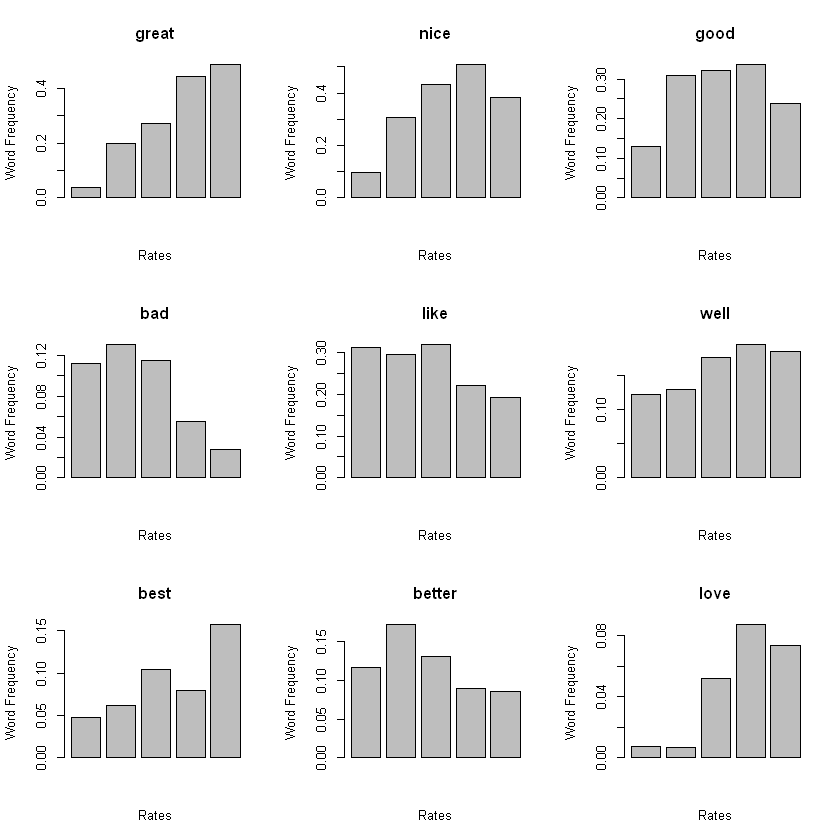

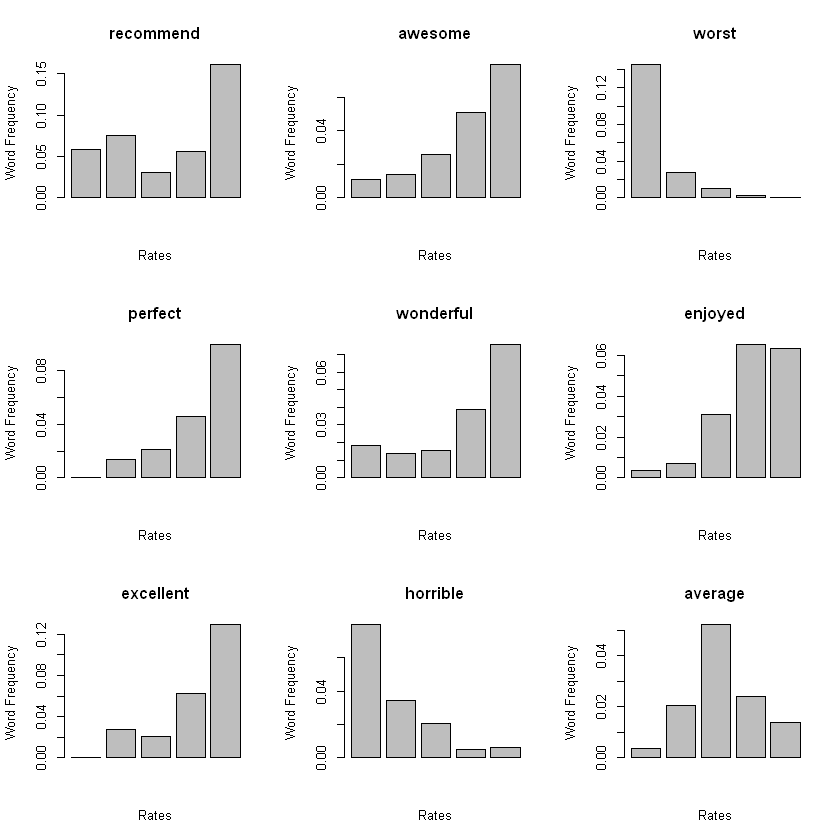

In [12]:
par(mfrow=c(3,3))
word.frequency("great")
word.frequency("nice")
word.frequency("good")
word.frequency("bad")
word.frequency("like")
word.frequency("well")
word.frequency("best")
word.frequency("better")
word.frequency("love")
word.frequency("recommend")
word.frequency("awesome")
word.frequency("worst")
word.frequency("perfect")
word.frequency("wonderful")
word.frequency("enjoyed")
word.frequency("excellent")
word.frequency("horrible")
word.frequency("average")

### 1. Words associated with service

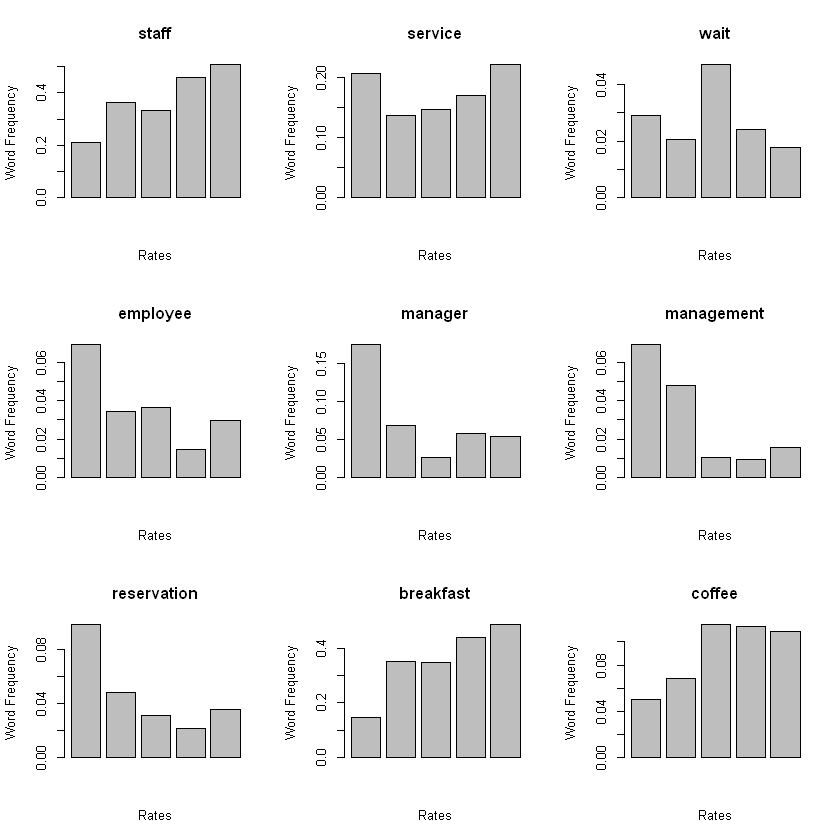

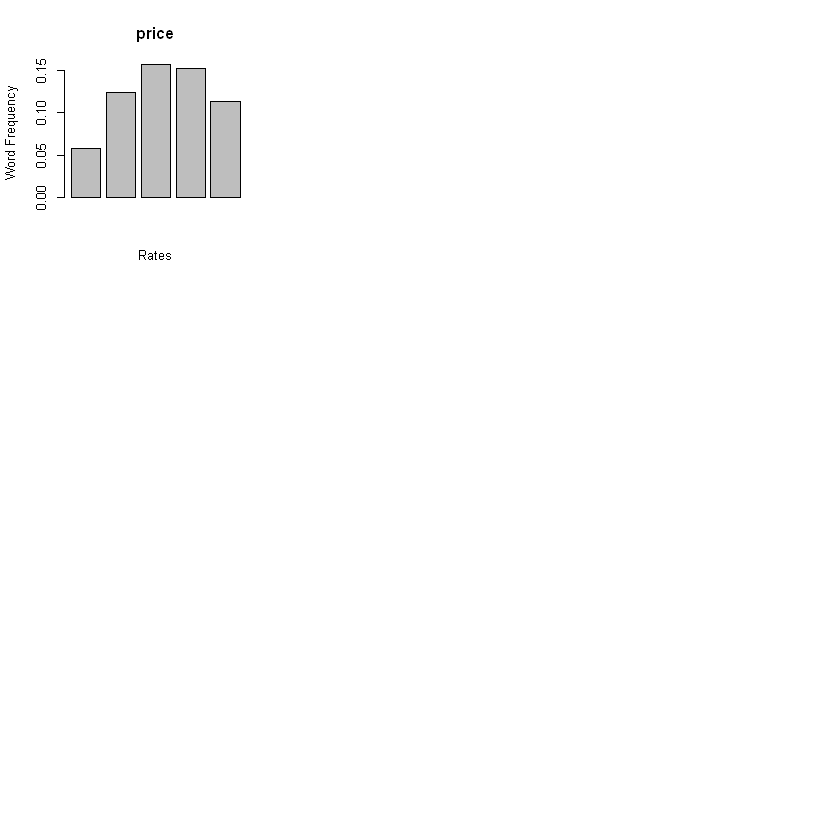

In [8]:
par(mfrow=c(3,3))
word.frequency("staff")
word.frequency("service")
word.frequency("wait")
word.frequency("employee")
word.frequency("manager")
word.frequency("management")
word.frequency("reservation")
word.frequency("breakfast")
word.frequency("coffee")
word.frequency("price")

### 2. Words associated with facility and furniture

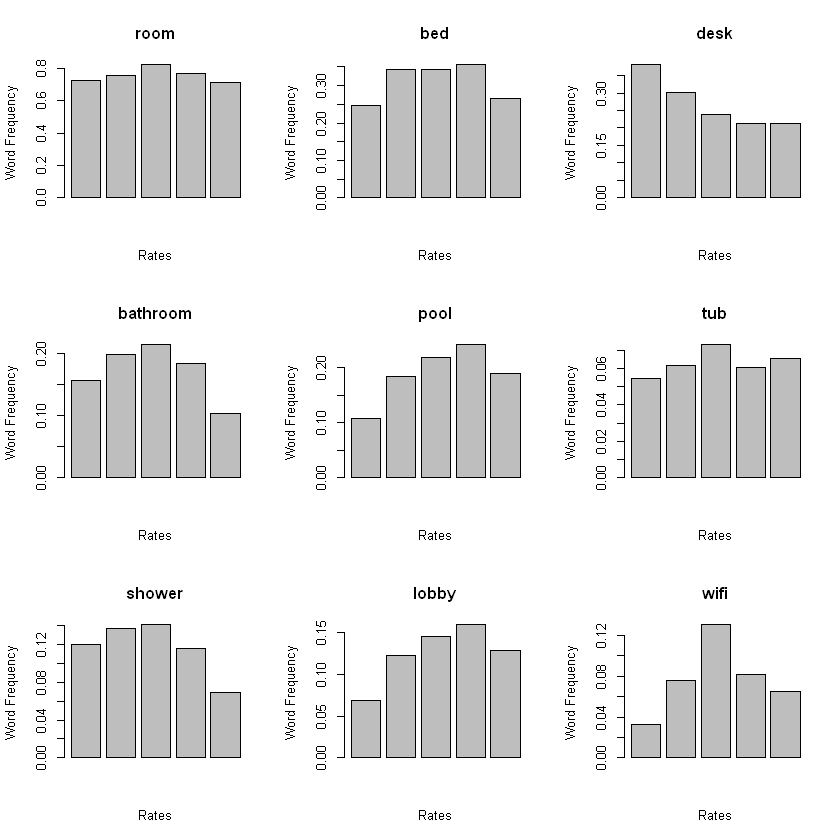

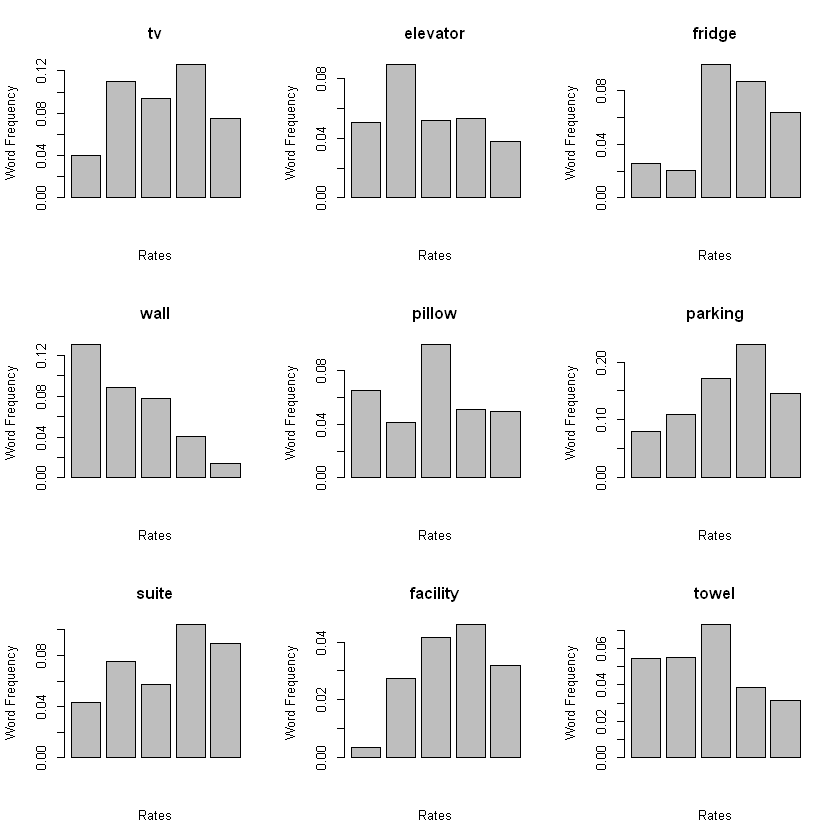

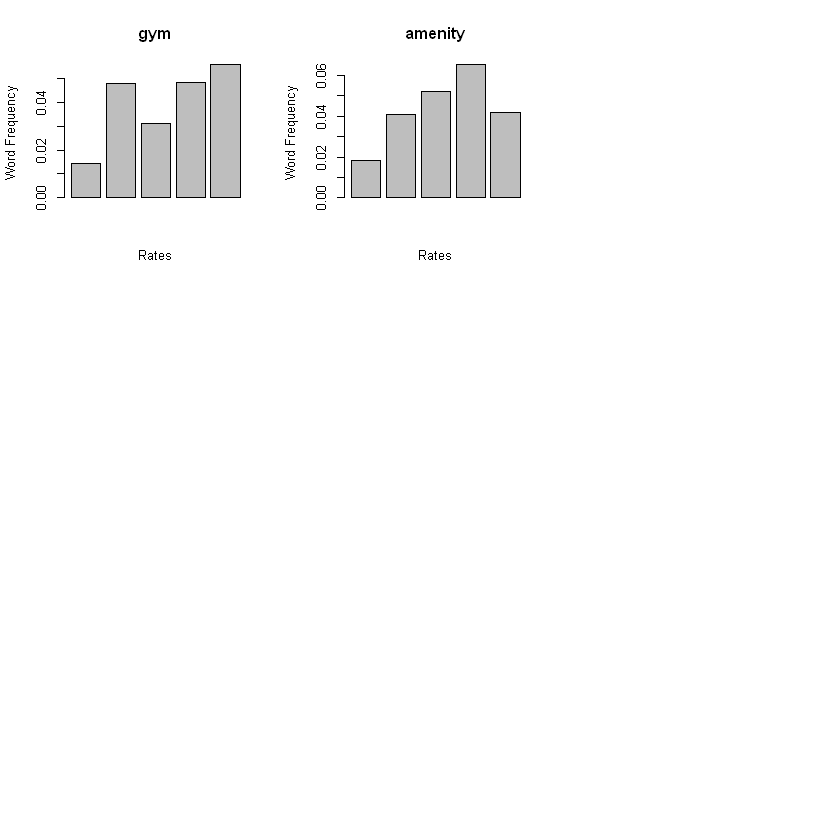

In [13]:
par(mfrow=c(3,3))
word.frequency("room")
word.frequency("bed")
word.frequency("desk")
word.frequency("bathroom")
word.frequency("pool")
word.frequency("tub")
word.frequency("shower")
word.frequency("lobby")
word.frequency("wifi")
word.frequency("tv")
word.frequency("elevator")
word.frequency("fridge")
word.frequency("wall")
word.frequency("pillow")
word.frequency("parking")
word.frequency("suite")
word.frequency("facility")
word.frequency("towel")
word.frequency("gym")
word.frequency("amenity")

### 3.Words associated with location

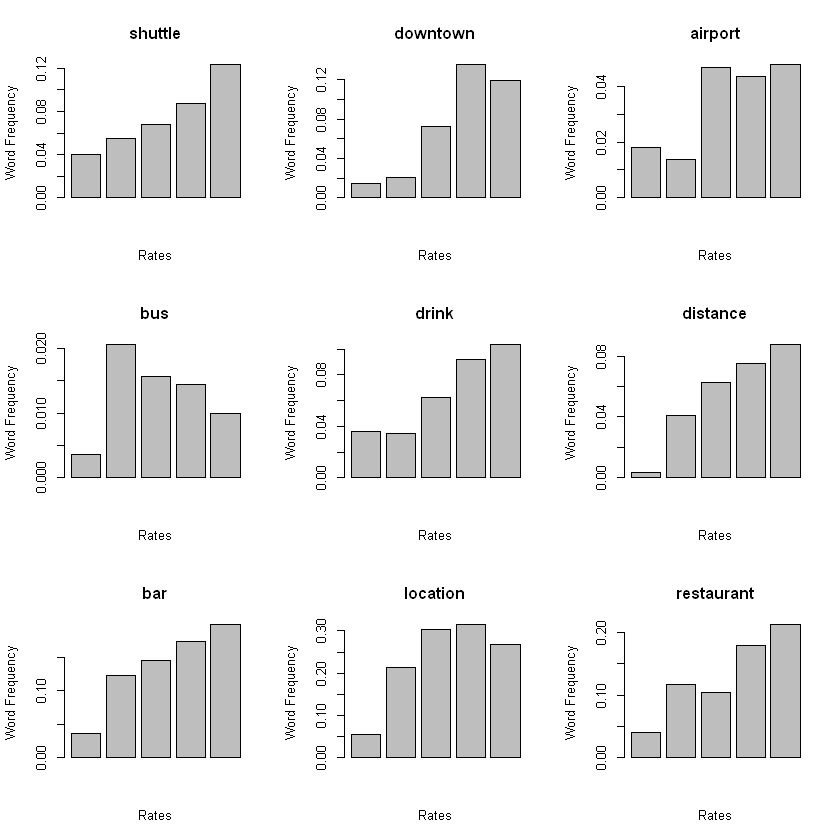

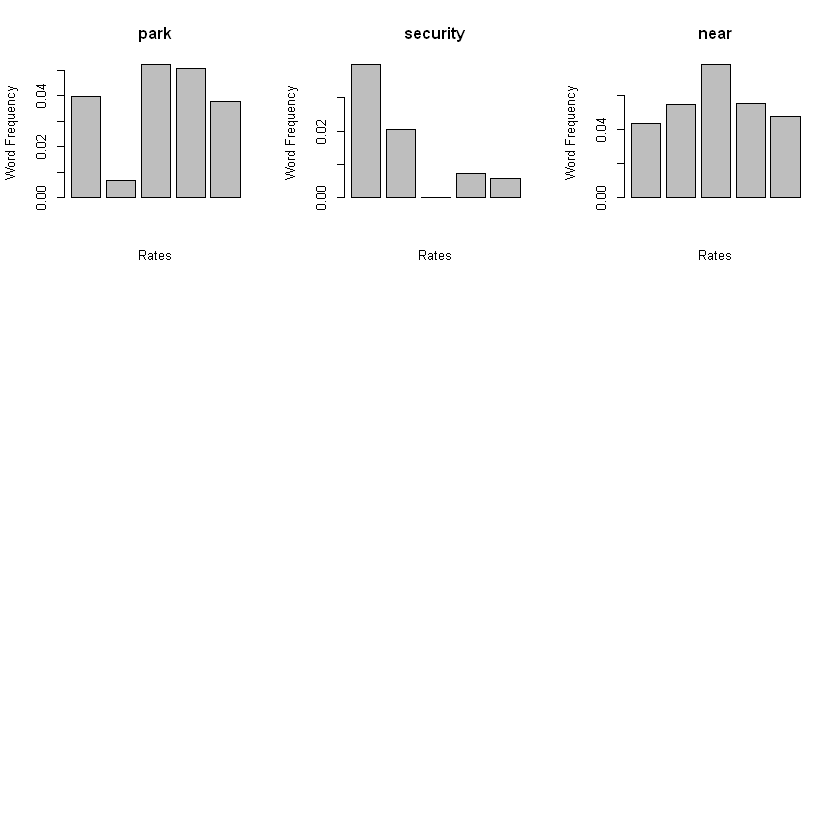

In [14]:
par(mfrow=c(3,3))
word.frequency("shuttle")
word.frequency("downtown")
word.frequency("airport")
word.frequency("bus")
word.frequency("drink")
word.frequency("distance")
word.frequency("bar")
word.frequency("location")
word.frequency("restaurant")
word.frequency("park")
word.frequency("security")
word.frequency("near")

### 4. Words associated with atmosphere of hotels

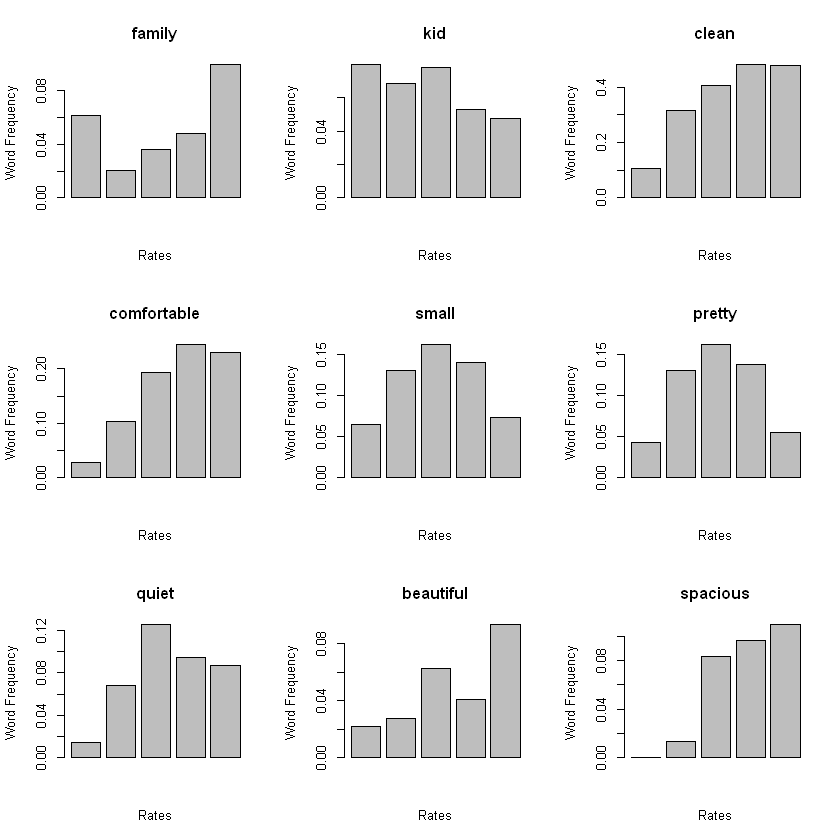

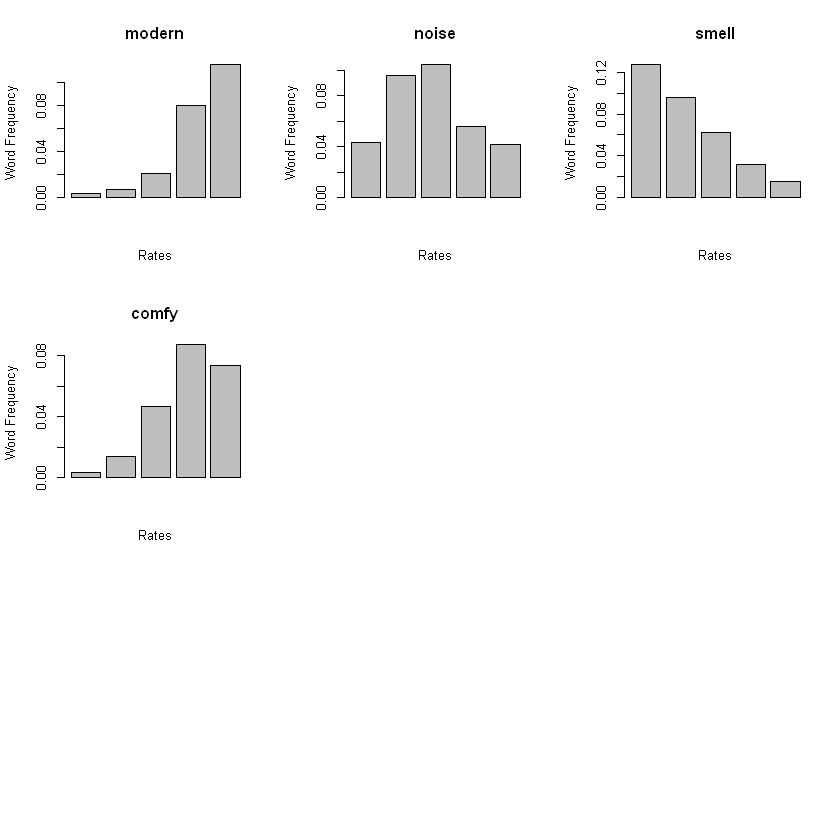

In [15]:
par(mfrow=c(3,3))
word.frequency("family")
word.frequency("kid")
word.frequency("clean")
word.frequency("comfortable")
word.frequency("small")
word.frequency("pretty")
word.frequency("quiet")
word.frequency("beautiful")
word.frequency("spacious")
word.frequency("modern")
word.frequency("noise")
word.frequency("smell")
word.frequency("comfy")

Based upon the bar plots, the roles of empolyees are important for determining the evaluation. Also, other services like reservation, provided breakfast and coffee are played important role to determine the evaluation. Interestingly, among the facility and funiture, desk, pool, lobby, wall, 

## Anova Test For the Choosen Words

In [26]:
anova(lm(staff~stars, data = dup.dat))
anova(lm(service~stars, data = dup.dat))
anova(lm(wait~stars, data = dup.dat))
anova(lm(employee~stars, data = dup.dat))
anova(lm(manager~stars, data = dup.dat))
anova(lm(management~stars, data = dup.dat))
anova(lm(reservation~stars, data = dup.dat))
anova(lm(breakfast~stars, data = dup.dat))
anova(lm(coffee~stars, data = dup.dat))
anova(lm(price~stars, data = dup.dat))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,17.95684,4.4892099,19.53343,1.083824e-15
Residuals,1527,350.93807,0.2298219,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.485331,0.3713327,2.453347,0.04414712
Residuals,1527,231.123024,0.1513576,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.1248432,0.03121081,1.258077,0.2845055
Residuals,1527,37.8823369,0.02480834,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.5027843,0.12569607,3.859429,0.003991803
Residuals,1527,49.7322027,0.03256857,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,3.51767,0.87941753,13.16549,1.513032e-10
Residuals,1527,101.99930,0.06679718,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.7856658,0.19641646,7.857698,2.877301e-06
Residuals,1527,38.1699477,0.02499669,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.072773,0.26819336,6.500799,3.470471e-05
Residuals,1527,62.997070,0.04125545,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,21.92428,5.4810702,24.65603,8.361487e-20
Residuals,1527,339.45431,0.2223014,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.9559926,0.23899814,2.749229,0.02696388
Residuals,1527,132.7463573,0.08693278,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.768383,0.4420957,4.215762,0.002131215
Residuals,1527,160.132401,0.1048673,NA,NA


In [27]:
anova(lm(room~stars, data = dup.dat))
anova(lm(bed~stars, data = dup.dat))
anova(lm(desk~stars, data = dup.dat))
anova(lm(bathroom~stars, data = dup.dat))
anova(lm(pool~stars, data = dup.dat))
anova(lm(tub~stars, data = dup.dat))
anova(lm(shower~stars, data = dup.dat))
anova(lm(lobby~stars, data = dup.dat))
anova(lm(wifi~stars, data = dup.dat))
anova(lm(tv~stars, data = dup.dat))
anova(lm(fridge~stars, data = dup.dat))
anova(lm(window~stars, data = dup.dat))
anova(lm(wall~stars, data = dup.dat))
anova(lm(pillow~stars, data = dup.dat))
anova(lm(parking~stars, data = dup.dat))
anova(lm(suite~stars, data = dup.dat))
anova(lm(facility~stars, data = dup.dat))
anova(lm(towel~stars, data = dup.dat))
anova(lm(gym~stars, data = dup.dat))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,2.101956,0.5254891,2.804245,0.02457948
Residuals,1527,286.145433,0.1873906,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,3.248013,0.8120033,3.86737,0.003936604
Residuals,1527,320.612953,0.2099626,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,6.366359,1.5915897,8.547014,8.063072e-07
Residuals,1527,284.351657,0.1862159,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,2.619648,0.6549120,4.988568,0.0005375502
Residuals,1527,200.468472,0.1312826,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,3.076994,0.7692484,4.995966,0.0005304608
Residuals,1527,235.118176,0.1539739,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.04555557,0.01138889,0.1933631,0.9419305
Residuals,1527,89.93877863,0.05889900,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.135337,0.28383421,2.998955,0.0176757
Residuals,1527,144.521974,0.09464438,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.43944,0.359860,3.242215,0.01166052
Residuals,1527,169.48484,0.110992,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.142449,0.28561224,4.247899,0.002013416
Residuals,1527,102.669561,0.06723612,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.379597,0.3448992,4.326675,0.001751169
Residuals,1527,121.724189,0.0797146,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.139924,0.2849811,4.850353,0.000688685
Residuals,1527,89.718431,0.0587547,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.5521305,0.13803264,4.089203,0.002665006
Residuals,1527,51.5444752,0.03375539,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,2.765521,0.69138025,13.16715,1.508349e-10
Residuals,1527,80.179649,0.05250796,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.4356279,0.10890699,1.99416,0.09301421
Residuals,1527,83.3940065,0.05461297,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,4.266604,1.0666511,8.249134,1.397837e-06
Residuals,1527,197.448148,0.1293046,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.7493506,0.18733765,2.564791,0.03670284
Residuals,1527,111.5352447,0.07304207,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.3225463,0.08063657,2.666723,0.03096435
Residuals,1527,46.1735373,0.03023807,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.2929985,0.07324963,1.705082,0.1462989
Residuals,1527,65.5992991,0.04295959,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.3449937,0.08624842,2.127744,0.07510276
Residuals,1527,61.8971734,0.04053515,NA,NA


In [28]:
anova(lm(shuttle~stars, data = dup.dat))
anova(lm(downtown~stars, data = dup.dat))
anova(lm(airport~stars, data = dup.dat))
anova(lm(bus~stars, data = dup.dat))
anova(lm(drink~stars, data = dup.dat))
anova(lm(distance~stars, data = dup.dat))
anova(lm(bar~stars, data = dup.dat))
anova(lm(location~stars, data = dup.dat))
anova(lm(restaurant~stars, data = dup.dat))
anova(lm(park~stars, data = dup.dat))
anova(lm(security~stars, data = dup.dat))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.483058,0.37076440,4.81895,0.0007285089
Residuals,1527,117.485611,0.07693884,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,3.606879,0.90171977,11.36623,4.312018e-09
Residuals,1527,121.141815,0.07933321,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.2694954,0.06737384,1.852533,0.1163356
Residuals,1527,55.5346822,0.03636849,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.03721347,0.009303367,0.8002931,0.5249447
Residuals,1527,17.75129828,0.011624950,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.201175,0.30029380,4.290977,0.00186554
Residuals,1527,106.863446,0.06998261,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.39510,0.34877510,6.133076,6.785254e-05
Residuals,1527,86.83728,0.05686789,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,5.095724,1.2739311,10.29407,3.164569e-08
Residuals,1527,188.972161,0.1237539,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,13.02228,3.255569,18.61197,5.994999e-15
Residuals,1527,267.09979,0.174918,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,6.214096,1.553524,12.58108,4.493259e-10
Residuals,1527,188.555486,0.123481,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.2384373,0.05960932,1.536198,0.1891855
Residuals,1527,59.2524243,0.03880316,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.2785493,0.06963733,5.464248,0.0002282422
Residuals,1527,19.4603541,0.01274417,NA,NA


In [29]:
anova(lm(family~stars, data = dup.dat))
anova(lm(kid~stars, data = dup.dat))
anova(lm(clean~stars, data = dup.dat))
anova(lm(comfortable~stars, data = dup.dat))
anova(lm(small~stars, data = dup.dat))
anova(lm(pretty~stars, data = dup.dat))
anova(lm(quiet~stars, data = dup.dat))
anova(lm(beautiful~stars, data = dup.dat))
anova(lm(spacious~stars, data = dup.dat))
anova(lm(modern~stars, data = dup.dat))
anova(lm(noise~stars, data = dup.dat))
anova(lm(smell~stars, data = dup.dat))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.14881,0.28720244,4.888645,0.0006430347
Residuals,1527,89.70955,0.05874888,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.2768076,0.0692019,1.21353,0.3030813
Residuals,1527,87.0776310,0.0570253,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,30.58652,7.6466300,35.07717,4.639421e-28
Residuals,1527,332.87758,0.2179945,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,10.15749,2.5393735,17.88916,2.296218e-14
Residuals,1527,216.75830,0.1419504,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,2.150909,0.53772713,5.721761,0.0001432265
Residuals,1527,143.506402,0.09397931,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,3.29784,0.82446012,9.714345,9.282514e-08
Residuals,1527,129.59707,0.08487038,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.701297,0.42532422,5.918159,0.0001002939
Residuals,1527,109.741915,0.07186766,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,1.243352,0.31083793,5.938391,9.667491e-05
Residuals,1527,79.928972,0.05234379,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,2.892593,0.72314816,10.85015,1.125977e-08
Residuals,1527,101.772551,0.06664869,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,3.257199,0.81429972,14.19428,2.226157e-11
Residuals,1527,87.601156,0.05736814,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,0.8131097,0.20327743,3.699712,0.005278431
Residuals,1527,83.8996840,0.05494413,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
stars,4,2.677034,0.66925857,13.63812,6.273315e-11
Residuals,1527,74.933932,0.04907265,NA,NA


La Quinta by Wyndham Madison American Center 
                                       3.512821 
    Clarion Suites at the Alliant Energy Center 
                                       3.548387 
              AmericInn by Wyndham Madison West 
                                       3.592593 
                 Comfort Inn Madison - Downtown 
                                       3.600000 
     Holiday Inn Madison at The American Center 
                                       3.625000 
Fairfield Inn & Suites by Marriott Madison East 
                                       3.727273 
                   Hyatt Place Madison Downtown 
                                       3.770115 
                     Cambria Hotel Madison East 
                                       3.807018 
                 Staybridge Suites Madison-East 
                                       3.833333 
         Homewood Suites by Hilton Madison West 
                                       3.861111 
The Madison Concourse Hotel and Governor's Club 
                                       3.962567 
       Hampton Inn Madison East Towne Mall Area 
                                       3.969697 
                             Sleep Inn & Suites 
                                       4.111111 
             DoubleTree by Hilton Hotel Madison 
                                       4.148649 
               Super 8 by Wyndham Madison South 
                                       4.157895 
           Holiday Inn Express & Suites Madison 
                                       4.166667 
                               Hotel Ruby Marie 
                                       4.220588 
                     Tru by Hilton Madison West 
                                       4.411765 
              Hampton Inn & Suites Madison-West 
                                       4.428571 
        Hampton Inn & Suites Madison / Downtown 
                                       4.569767 
   Holiday Inn Express & Suites Madison Central 
                                       4.647059 
                      SpringHill Suites Madison 
                                       4.750000 
                  Hotel Indigo Madison Downtown 
                                       4.769231

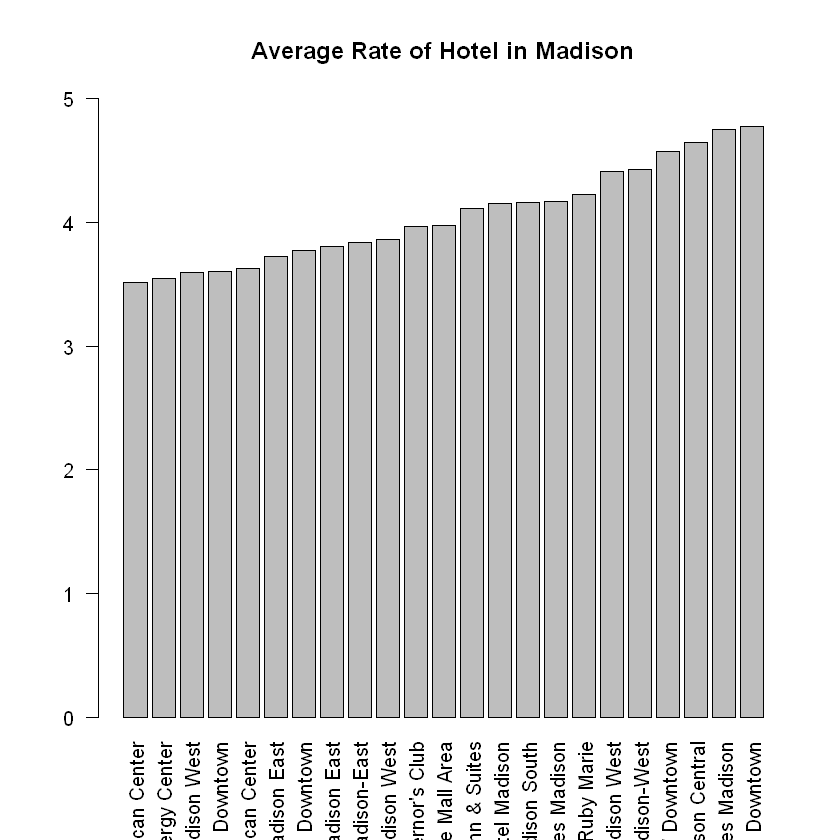

In [41]:
avg.hotel <- sort(tapply(dat$stars_x,dat$name,mean))
avg.hotel[avg.hotel > avg.hotel["AC Hotel by Marriott Madison Downtown"]]
par(cex.axis=1)
barplot(avg.hotel[avg.hotel > avg.hotel["AC Hotel by Marriott Madison Downtown"]], main = "Average Rate of Hotel in Madison", ylim = c(0,5),las=2)

In [ ]:
review.len <- c()
for(i in 1:length(names(avg.hotel))){
review.len[i] <- length(dat$stars_x[which(dat$name==names(avg.hotel)[i])])
}

length(dat$stars_x[which(dat$name=="AC Hotel by Marriott Madison Downtown")])
barplot(table(dat$stars_x[which(dat$name==names(avg.hotel)[22])]),xlab="Stars",ylab="Number of Review", main=names(avg.hotel)[22], cex.main = 0.7)

ac.dat <- dat[which(dat$name=="AC Hotel by Marriott Madison Downtown"),-c(1,3:10)]
ac.words <- apply(ac.dat[,2:dim(ac.dat)[2]],2,sum)
sort(ac.words[ac.words>summary(ac.words)[5]], decreasing= TRUE)

In [ ]:
word.ac.frequency <- function(argument1){
ind <- argument1
total.star1 <-length(which(ac.dat$stars_x == 1))
total.star2 <-length(which(ac.dat$stars_x == 2))
total.star3 <-length(which(ac.dat$stars_x == 3))
total.star4 <-length(which(ac.dat$stars_x == 4))
total.star5 <-length(which(ac.dat$stars_x == 5))
total.v <- c(total.star1,total.star2,total.star3,total.star4,total.star5)

freq.dat <- cbind(ac.dat$stars_x,ac.dat[,ind])
star1 <-length(which(freq.dat[,1] == 1 & freq.dat[,2] >= 1))
star2 <-length(which(freq.dat[,1] == 2 & freq.dat[,2] >= 1))
star3 <-length(which(freq.dat[,1] == 3 & freq.dat[,2] >= 1))
star4 <-length(which(freq.dat[,1] == 4 & freq.dat[,2] >= 1))
star5 <-length(which(freq.dat[,1] == 5 & freq.dat[,2] >= 1))
v <- c(star1, star2, star3, star4, star5)

Frequency <- v/total.v

barplot(Frequency, xlab = "Rates", ylab = "Word Frequency", main=ind)
}